#### This notebook provides a high level analysis on the orders data of the terpbuy database

In [2]:
# Import packages
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Connect to MySQL database
conn = mysql.connector.connect(user='root',password='Admin@123',host='localhost',database='terpbuy')
curs = conn.cursor()

In [4]:
# Question Number 1:

# Write SQL Query to fetch the number of quantities sold in each department sorted by department name
sql = """select d.department_name, sum(quantity_sold) from product p 
inner join department d
on p.department_id = d.department_id
inner join order_line ol 
on p.product_id = ol.product_id 
group by 1
order by 1;"""

# Execute SQL query
curs.execute(sql)
op = curs.fetchall()

# Add the data to the dataframe
quantities = pd.DataFrame(op,columns=['Department Name','Quantities Sold'])

       Department Name  Quantities Sold
0              Apparel           2336.0
1            Book Shop             12.0
2           Discs Shop            285.0
3             Fan Shop           2406.0
4              Fitness            244.0
5             Footwear            932.0
6                 Golf           2355.0
7   Health and Beauty              64.0
8             Outdoors            812.0
9             Pet Shop             54.0
10          Technology             39.0


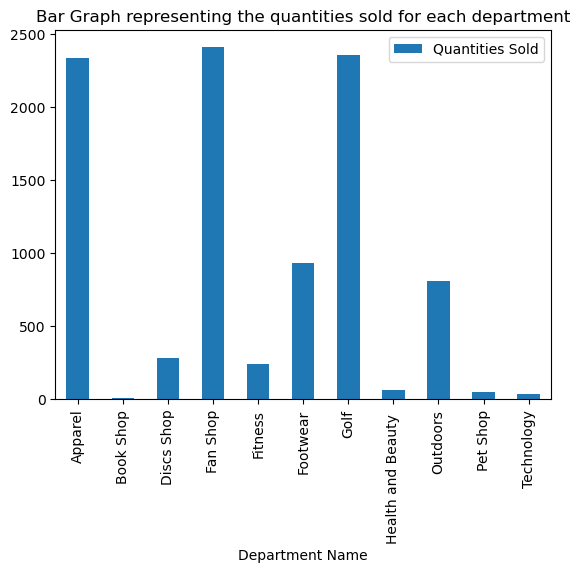

In [5]:
# Question Number 2:

# Convert the Quanitites Sold Column to Float
quantities['Quantities Sold'] = quantities['Quantities Sold'].astype(float)
print(quantities)

# Plot the graph for the dataframe
quantities.plot(x='Department Name', y='Quantities Sold', kind='bar')

# Add title to the bar graph
plt.title("Bar Graph representing the quantities sold for each department")

# Show the graph in the console
plt.show()

#### From the above analysis, we can observe the following points:
1. The most popular departments whose products are being sold are Apparel, Fan Shop and Golf that are over 2000.
2. The least popular departments whose products are not getting sold are Book Shop, Pet Shop, Technology and Health & Beauty with less than a 100


In [6]:
# Question Number 3:

# Write SQL query to fetch the number of orders made each year
sql = """select extract(year from order_date) as order_year,count(distinct order_id) Orders
from orders
group by 1;"""

# Execute SQL query
curs.execute(sql)
op = curs.fetchall()

# Add the output to the dataframe
orders = pd.DataFrame(op,columns=['Order Year','Orders Made'])
print(orders)

   Order Year  Orders Made
0        2018          585
1        2019          708
2        2020          497
3        2021          362


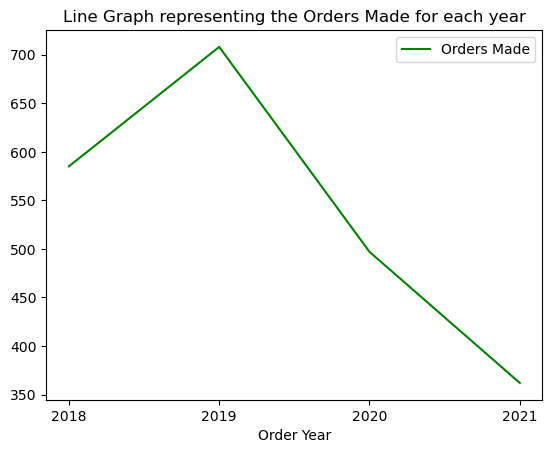

In [7]:
# Convert the Orders Made Column to Float
orders['Orders Made'] = orders['Orders Made'].astype(float)

# Plot the graph for the dataframe
ax = orders.plot(x='Order Year', y='Orders Made', kind='line',color='green')

# Set X-Ticks to avoid values like 2018.5, 2019.5 etc
ax.set_xticks(orders['Order Year'])

# Add Title for the line graph
plt.title("Line Graph representing the Orders Made for each year")

# Show the graph
plt.show()

#### From the above analysis, we can observe the following points:
1. From 2018 to 2019 there was an increase in the number of orders by more than a 100
2. From 2019 till 2021, there has been a steep decrease in the number of orders by near 50%